In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# List of possible encodings to try
encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'cp1252']

# File path
file_path = "spam.csv"  # Change this to the path of your csv file

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break  # Stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue  # Try the next encoding

# Check if the loop completed successfully
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
File successfully read with encoding: latin-1
CSV file has been successfully loaded.


In [3]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [5]:
print(df.describe())

          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [6]:
# Remove unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Check for missing values
print(df.isnull().sum())

# Drop any missing values (if any)
df.dropna(inplace=True)


label      0
message    0
dtype: int64


<ipython-input-6-701cc71b4c30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


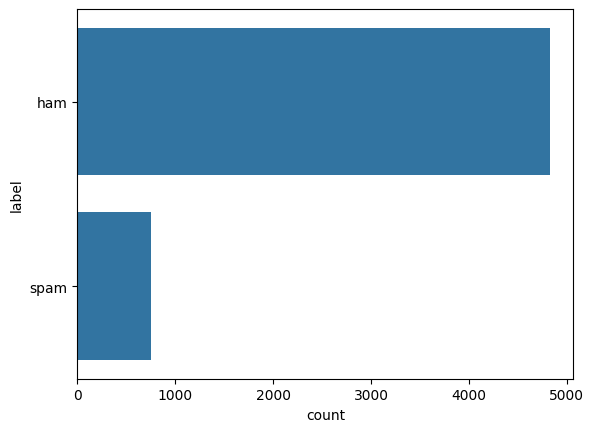

label
ham     4825
spam     747
Name: count, dtype: int64


In [7]:
# Plot the distribution of labels
sns.countplot(df['label'])
plt.show()

# Show the distribution in numbers
print(df['label'].value_counts())


In [8]:
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Text preprocessing function
import re
import string

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply preprocessing to messages
df['message'] = df['message'].apply(preprocess_text)


In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data, transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


SVM with Linear Kernel
Accuracy: 0.9829596412556054
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[964   1]
 [ 18 132]]


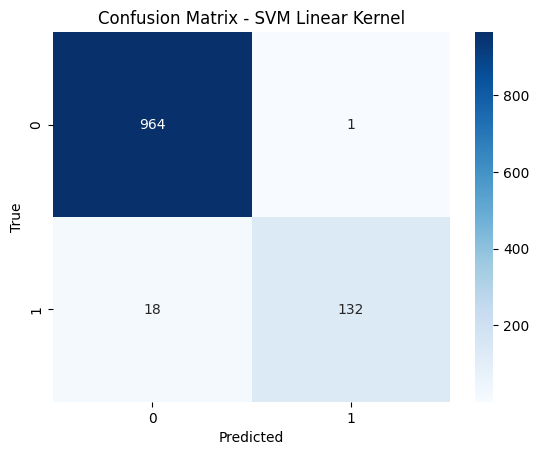

In [12]:
# Initialize and train the SVM model with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test_tfidf)

# Evaluate the model
print("SVM with Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Plot confusion matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - SVM Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM with Polynomial Kernel
Accuracy: 0.9452914798206278
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       1.00      0.59      0.74       150

    accuracy                           0.95      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.95      0.94      1115

Confusion Matrix:
 [[965   0]
 [ 61  89]]


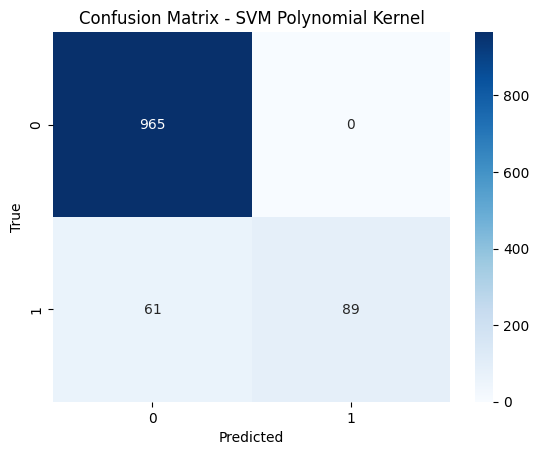

In [13]:
# Initialize and train the SVM model with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_poly = svm_poly.predict(X_test_tfidf)

# Evaluate the model
print("SVM with Polynomial Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))

# Plot confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - SVM Polynomial Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM with RBF Kernel
Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[965   0]
 [ 24 126]]


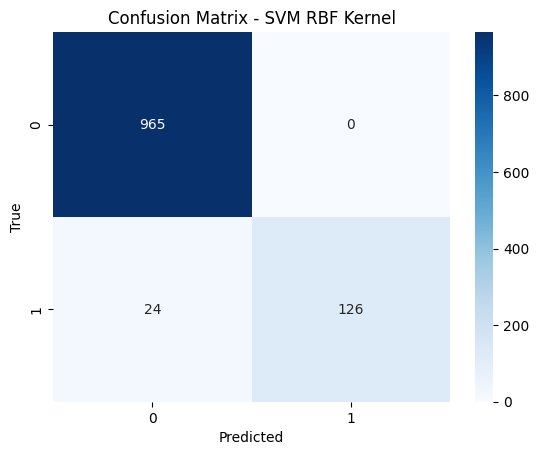

In [14]:
# Initialize and train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rbf = svm_rbf.predict(X_test_tfidf)

# Evaluate the model
print("SVM with RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

# Plot confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - SVM RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [17]:
# Save the SVM model with linear kernel and vectorizer
joblib.dump(svm_linear, 'svm_linear_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [18]:
# Load the SVM model and vectorizer
loaded_svm_model = joblib.load('svm_linear_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Example of using the loaded model
new_message = "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now."
new_message_processed = preprocess_text(new_message)
new_message_tfidf = loaded_vectorizer.transform([new_message_processed])
prediction = loaded_svm_model.predict(new_message_tfidf)

print("Prediction:", "Spam" if prediction[0] else "Not Spam")


Prediction: Spam


Logistic Regression
Accuracy: 0.9650224215246637
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
 [[965   0]
 [ 39 111]]


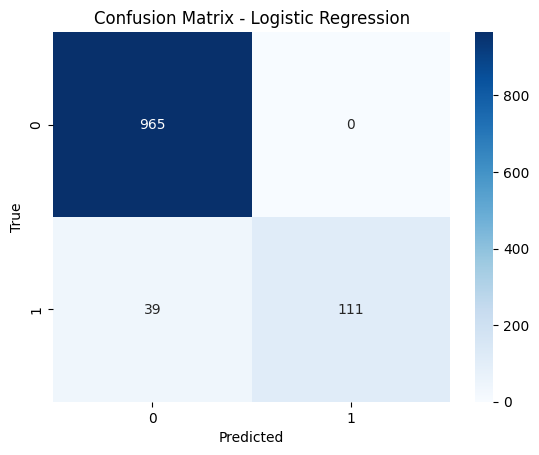

In [19]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Plot confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Classifier
Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[965   0]
 [ 26 124]]


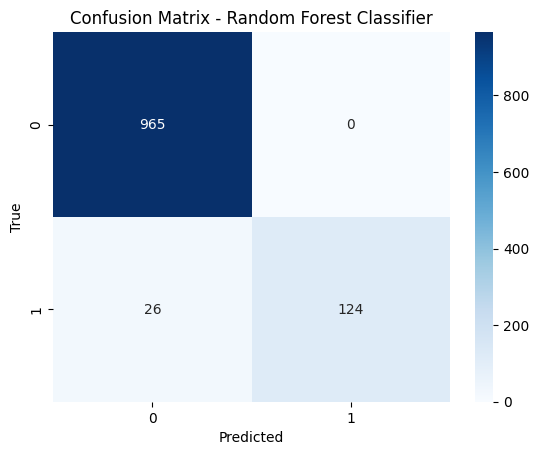

In [22]:
# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_tfidf)

# Evaluate the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Naive Bayes
Accuracy: 0.9623318385650225
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
 [[965   0]
 [ 42 108]]


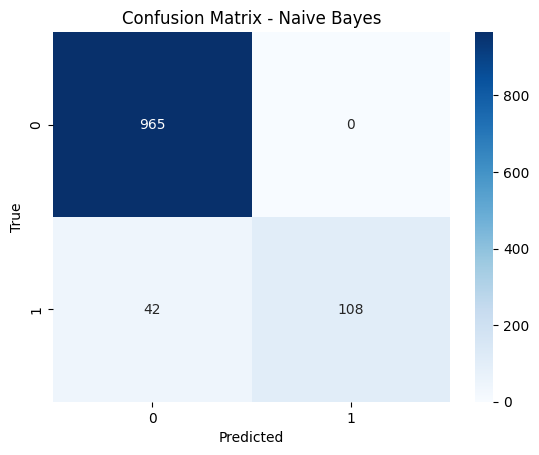

In [23]:
# Initialize and train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate the model
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Plot confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


K-Nearest Neighbors (KNN)
Accuracy: 0.9201793721973094
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       965
           1       1.00      0.41      0.58       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.77      1115
weighted avg       0.93      0.92      0.91      1115

Confusion Matrix:
 [[965   0]
 [ 89  61]]


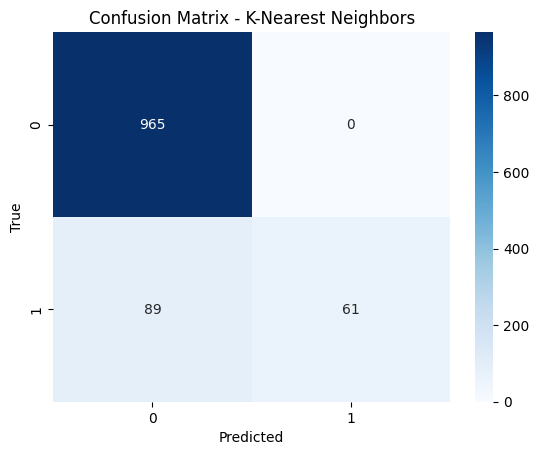

In [26]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_tfidf)

# Evaluate the model
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
